In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read data 

In [2]:
#load data 
files = os.listdir('./data')  #list all the data files
dataDic = {}                  #use dictionary to store all the data
for i in range(len(files)):
    dataDic[files[i][:-4]] = pd.read_csv('./data/'+files[i]) 

scales_description_pd = dataDic['scales_description'] 
participants_pd = dataDic['participants'] 
heart_rate_pd = dataDic['heart_rate'] 
blood_pressure_pd = dataDic['blood_pressure'] 
hrv_measurements_pd = dataDic['hrv_measurements'] 
wearables_pd = dataDic['wearables'] 
sleep_pd = dataDic['sleep'] 
surveys_pd = dataDic['surveys'] 
weather_pd = dataDic['weather'] 

## 1. A function to plot and print out time interval for each category of one patient.
### Input: Single patient code

In [3]:
def CheckTimeInterval(PatientCode, Ifplot):
    '''
    Input: 
        1. PatientCode: string, patient code
        2. Ifplot: Boolean values, True if plot, False otherwise. 
    Output:
        1. A plot of recorded time for each category
        2. Dictionary: time points of every recorded time for each category
    '''
    
    heart_rate_time = [datetime.strptime(d,"%Y-%m-%d %H:%M:%S") 
                       for d in heart_rate_pd.loc[heart_rate_pd.user_code==PatientCode, 'datetime'] ]
    blood_pressure_time = [datetime.strptime(d,"%Y-%m-%d %H:%M:%S") 
                       for d in blood_pressure_pd.loc[blood_pressure_pd.user_code==PatientCode, 'measurement_datetime'] ]
    hrv_measurements_time = [datetime.strptime(d,"%Y-%m-%d %H:%M:%S") 
                       for d in hrv_measurements_pd.loc[hrv_measurements_pd.user_code==PatientCode,'measurement_datetime']]
    wearables_time = [datetime.strptime(d,"%Y-%m-%d") 
                       for d in wearables_pd.loc[wearables_pd.user_code==PatientCode, 'day'] ]
    sleep_time = [datetime.strptime(d,"%Y-%m-%d") 
                       for d in sleep_pd.loc[sleep_pd.user_code==PatientCode, 'day'] ]
    surveys_time = [datetime.strptime(d,"%Y-%m-%d") 
                       for d in surveys_pd.loc[surveys_pd.user_code==PatientCode, 'created_at'] ]
    weather_time = [datetime.strptime(d,"%Y-%m-%d") 
                       for d in weather_pd.loc[weather_pd.user_code==PatientCode, 'day'] ]
    minDate, maxDate = (min(heart_rate_time + blood_pressure_time + hrv_measurements_time + 
                            wearables_time + sleep_time + surveys_time + weather_time),
                        max(heart_rate_time + blood_pressure_time + hrv_measurements_time + 
                            wearables_time + sleep_time + surveys_time + weather_time))
    Dic_time = {"PatientCode":PatientCode, 
                "heart_rate_time":heart_rate_time, 
                "blood_pressure_time":blood_pressure_time,
                "hrv_measurements_time": hrv_measurements_time, 
                "wearables_time":wearables_time,
                "sleep_time": sleep_time, 
                "surveys_time":surveys_time, 
                "weather_time":weather_time}
    
    if Ifplot:
        
        fig, ax = plt.subplots(figsize=(15, 8))
        ax.set(title="Recorded time for patient  %s"%PatientCode)
        ax.set_ylim([-1, 7.5])

        for i in range(7):
            ax.hlines(i, minDate, maxDate, linestyles='solid')
            key = list(Dic_time.keys())[i+1] 
            ax.plot(Dic_time[key], np.ones_like(Dic_time[key])*i, "o",color="r")  
            plt.annotate(key[:-5], xy=(minDate, i+0.1),  fontsize=14)

        # remove y axis and spines
        ax.get_yaxis().set_visible(False)
        for spine in ["left", "top", "right"]:
            ax.spines[spine].set_visible(False)
        plt.show()
    
    return Dic_time
    

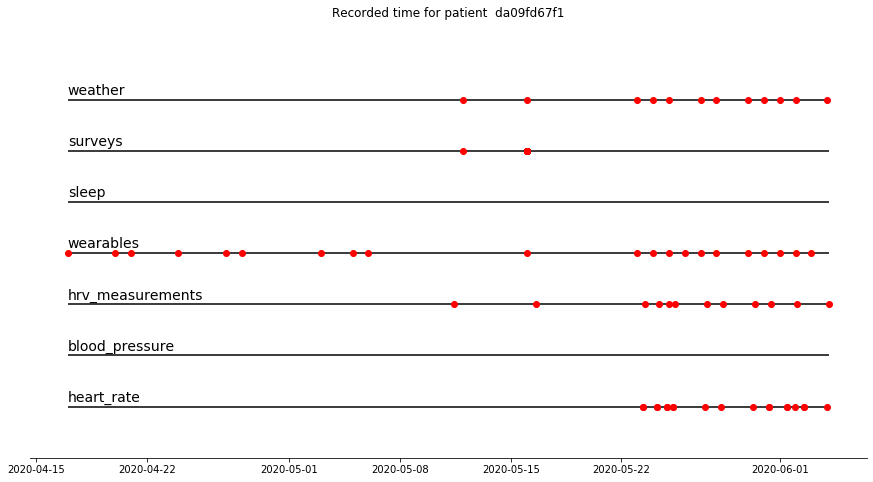

{'PatientCode': 'da09fd67f1',
 'blood_pressure_time': [],
 'heart_rate_time': [datetime.datetime(2020, 5, 23, 9, 17, 22),
  datetime.datetime(2020, 5, 23, 9, 17, 22),
  datetime.datetime(2020, 5, 24, 6, 11, 21),
  datetime.datetime(2020, 5, 24, 6, 11, 21),
  datetime.datetime(2020, 5, 24, 20, 24, 39),
  datetime.datetime(2020, 5, 24, 20, 24, 39),
  datetime.datetime(2020, 5, 25, 5, 59, 57),
  datetime.datetime(2020, 5, 25, 5, 59, 57),
  datetime.datetime(2020, 5, 27, 6, 43, 52),
  datetime.datetime(2020, 5, 28, 7, 11, 5),
  datetime.datetime(2020, 5, 30, 7, 3, 10),
  datetime.datetime(2020, 5, 31, 8, 15, 23),
  datetime.datetime(2020, 5, 31, 8, 15, 23),
  datetime.datetime(2020, 6, 1, 11, 38, 34),
  datetime.datetime(2020, 6, 1, 11, 38, 34),
  datetime.datetime(2020, 6, 1, 23, 13, 44),
  datetime.datetime(2020, 6, 2, 12, 40, 8),
  datetime.datetime(2020, 6, 2, 12, 40, 8),
  datetime.datetime(2020, 6, 3, 23, 13, 9)],
 'hrv_measurements_time': [datetime.datetime(2020, 5, 11, 10, 31, 32),

In [4]:
#Example
CheckTimeInterval('da09fd67f1', True)

## 2. A function to plot time series for some variables of one patient. 
### Input: Single patient code . 

In [5]:
def CheckDataSeries(patients_code, heart_rate, blood_pres, tot_power, sleepDur, outdoorTemp ):
    '''
    input: 
        patients_code: string, ONE Patient Code
        heart_rate: Boolean   #heart rate
        blood_pres: Boolean   #blood pressure 
        tot_power: Boolean    #the total power of HF, LF, and VLF waves generated by the heart.
        sleepDur: Boolean     #time asleep
        outdoorTemp: Boolean  #outdoor air temperature
    output: 
        line charts of variables with True, given patient code
    '''

    if heart_rate: 
        print("Heart rate:")
        print("--------------------------------------------------------------------------:")
        plt.figure(0,figsize=(15,10))  

        #heart_rate file
        plt.subplot(3,2,1)
        hr_file = heart_rate_pd.loc[heart_rate_pd.user_code==patients_code,]   #heart_rate file for patient i  
        plt.plot(hr_file['datetime'],hr_file['heart_rate'], '--sg', lw=2  )  #heart rate variable 
        plt.xticks(rotation=70)
        if hr_file['datetime'].shape[0]>45:  #sparse xlab if too many labels 
            plt.xticks(np.arange(0,hr_file['datetime'].shape[0],5))
        plt.xlabel('time',fontsize=14) 
        plt.ylabel('beats per minute',fontsize=14) 
        plt.title('Heart rate in heart_rate ', fontsize=16)

        #hrv_measurements file
        plt.subplot(3,2,2)
        hrv_file = hrv_measurements_pd.loc[hrv_measurements_pd.user_code==patients_code,]  #hrv_mea file for patient i
        plt.plot(hrv_file['measurement_datetime'],hrv_file['bpm'],'--sg',lw=2)  #bpm variable 
        plt.xticks(rotation=70)
        if hrv_file['measurement_datetime'].shape[0]>45:   
            plt.xticks(np.arange(0,hrv_file['measurement_datetime'].shape[0],5))
        plt.xlabel('time',fontsize=14) 
        plt.ylabel('beats per minute',fontsize=14) 
        plt.title('Heart rate in hrv_measurements', fontsize=16)

        #sleep file
        plt.subplot(3,2,5)
        s_file = sleep_pd.loc[sleep_pd.user_code==patients_code,]  #sleep file for patient i
        plt.plot(s_file['day'],s_file['pulse_average'],'--sg',lw=2, )  #pulse_average variable
        plt.xticks(rotation=70)
        if s_file['day'].shape[0]>45: 
            plt.xticks(np.arange(0,s_file['day'].shape[0],5))
        plt.xlabel('time',fontsize=14) 
        plt.ylabel('beats per minute',fontsize=14) 
        plt.title('Heart rate in sleep', fontsize=16)

        #wearables file
        plt.subplot(3,2,6)
        w_file = wearables_pd.loc[wearables_pd.user_code==patients_code,]  #wearables file for patient i
        plt.plot(w_file['day'],w_file['pulse_average'],'--sg', lw=2, )  #pulse_average variable
        plt.xticks(rotation=70)
        if w_file['day'].shape[0]>45: 
            plt.xticks(np.arange(0,w_file['day'].shape[0],5))
        plt.xlabel('time',fontsize=14) 
        plt.ylabel('beats per minute',fontsize=14) 
        plt.title('Heart rate in wearables', fontsize=16)   
        plt.show()


    if blood_pres: 
        print("Blood pressure:")
        print("--------------------------------------------------------------------------:")
        plt.figure(1,figsize=(15,5))  
        
        #blood_pressure file
        plt.subplot(1,2,1)
        bp_file = blood_pressure_pd.loc[blood_pressure_pd.user_code==patients_code,]  #blood_pressure file for patient i
        plt.plot(bp_file['measurement_datetime'],bp_file['diastolic'],'--sr', lw=2)  #diastolic variable
        plt.xticks(rotation=70)
        if bp_file['measurement_datetime'].shape[0]>45: 
            plt.xticks(np.arange(0,bp_file['measurement_datetime'].shape[0],5))
        plt.xlabel('time',fontsize=10) 
        plt.ylabel('millimeters of mercury',fontsize=14) 
        plt.title('Diastolic blood pressure', fontsize=16)

        plt.subplot(1,2,2)
        plt.plot(bp_file['measurement_datetime'],bp_file['systolic'],'--sr', lw=2)  #systolic variable
        plt.xticks(rotation=70)
        if bp_file['measurement_datetime'].shape[0]>45: 
            plt.xticks(np.arange(0,bp_file['measurement_datetime'].shape[0],5))
        plt.xlabel('time',fontsize=10) 
        plt.ylabel('millimeters of mercury',fontsize=14) 
        plt.title('Systolic blood pressure', fontsize=16)
        plt.show()

    if tot_power: 
        print("Total power:")
        print("--------------------------------------------------------------------------:")
        plt.figure(2,figsize=(8,5))  
        #hrv_measurements file
        hrv_file = hrv_measurements_pd.loc[hrv_measurements_pd.user_code==patients_code,]  #hrv_mea file for patient i
        plt.plot(hrv_file['measurement_datetime'],hrv_file['total_power'],'--sy',lw=2)  #bpm variable 
        plt.xticks(rotation=70)
        if hrv_file['measurement_datetime'].shape[0]>45:   
            plt.xticks(np.arange(0,hrv_file['measurement_datetime'].shape[0],5))
        plt.xlabel('time',fontsize=14) 
        plt.ylabel('$milliseconds^2$',fontsize=14) 
        plt.title('Total power waves generated by the heart', fontsize=16)
        plt.show()


    if sleepDur: 
        print("Time asleep:")
        print("--------------------------------------------------------------------------:")
        #sleep file
        plt.figure(3,figsize=(8,5))  
        s_file = sleep_pd.loc[sleep_pd.user_code==patients_code,]  #wearables file for patient i
        plt.plot(s_file['day'],s_file['sleep_duration'],'--sb',lw=2)  #bpm variable 
        plt.xticks(rotation=70)
        if w_file['day'].shape[0]>45:   
            plt.xticks(np.arange(0,s_file['day'].shape[0],5))
        plt.xlabel('time',fontsize=14) 
        plt.ylabel('hours',fontsize=14) 
        plt.title('Time asleep', fontsize=16)
        plt.show()

    if outdoorTemp: 
        print("Outdoor air temperature:")
        print("--------------------------------------------------------------------------:")
        plt.figure(4,figsize=(8,5))  
        #weather file
        weather_file = weather_pd.loc[weather_pd.user_code==patients_code,]  #wearables file for patient i
        plt.plot(weather_file['day'],weather_file['avg_temperature_C'],'--sk',lw=2)  #bpm variable 
        plt.xticks(rotation=70)
        if weather_file['day'].shape[0]>45:   
            plt.xticks(np.arange(0,weather_file['day'].shape[0],5))
        plt.xlabel('time',fontsize=14) 
        plt.ylabel('°C',fontsize=14) 
        plt.title('Outdoor air temperature', fontsize=16)
        plt.show()

Heart rate:
--------------------------------------------------------------------------:


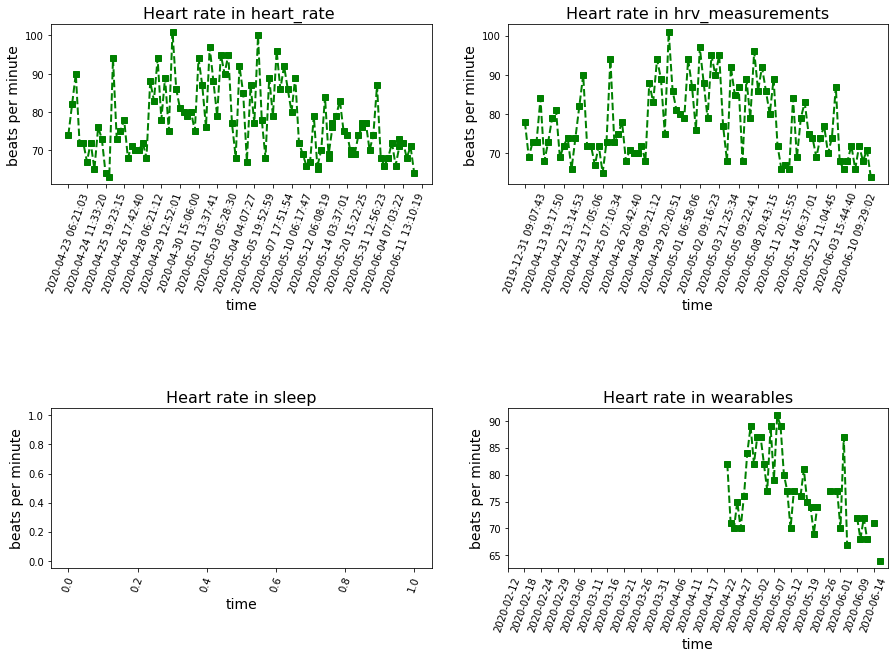

Blood pressure:
--------------------------------------------------------------------------:


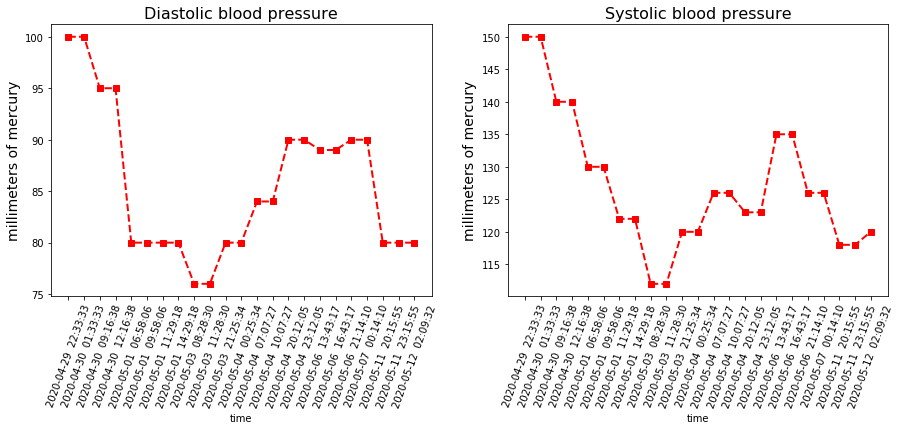

Total power:
--------------------------------------------------------------------------:


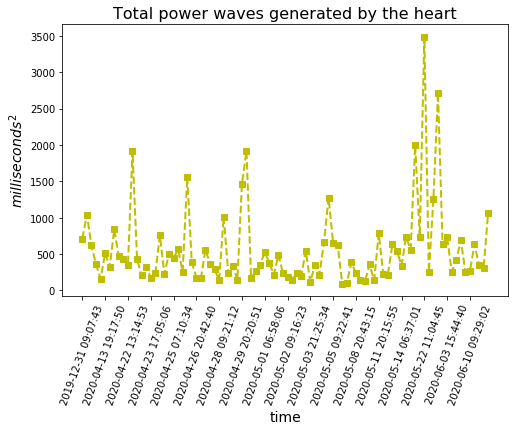

Time asleep:
--------------------------------------------------------------------------:


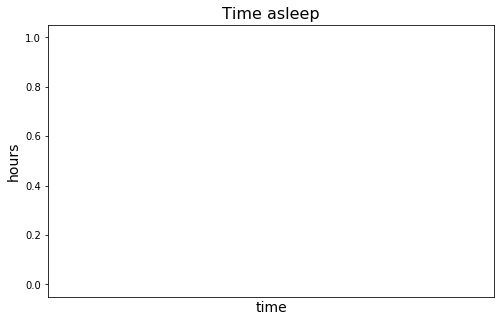

Outdoor air temperature:
--------------------------------------------------------------------------:


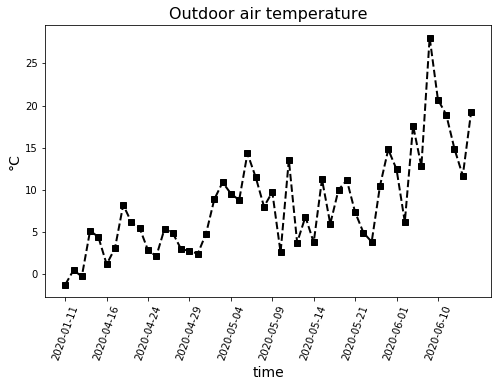

In [6]:
#example
CheckDataSeries('01bad5a519', 
              heart_rate = True, 
              blood_pres = True, 
              tot_power = True, 
              sleepDur = True,
              outdoorTemp = True) 

## 3. A function to print out data distribution for some categories of some patients
### Input: One or more patient codes

In [7]:
def CheckDataDist(patients_codes, heart_rate, blood_pres, tot_power, sleepDur, outdoorTemp ):
    '''
    input: 
        patients_codes: a list of Patient Code
        heart_rate: Boolean   #heart rate
        blood_pres: Boolean   #blood pressure 
        tot_power: Boolean    #the total power of HF, LF, and VLF waves generated by the heart.
        sleepDur: Boolean     #time asleep
        outdoorTemp: Boolean  #outdoor air temperature
    output: 
        line charts of variables with True, given patient code
    '''

    if heart_rate: 
        print("Heart rate:")
        print("--------------------------------------------------------------------------:")
        plt.figure(0,figsize=(10,10))  

        #heart_rate file
        plt.subplot(2,2,1)
        hr_file = heart_rate_pd.loc[heart_rate_pd.user_code.isin(patients_codes),] #heart_rate file for selected patient 
        hr_file_hr = hr_file['heart_rate'][~pd.isnull(hr_file['heart_rate'])] #remove NAN  
        plt.hist(hr_file_hr ,  density=0, facecolor='teal')  #heart rate variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Heart rate in heart_rate', fontsize=16)

        #hrv_measurements file
        plt.subplot(2,2,2)
        hrv_file = hrv_measurements_pd.loc[hrv_measurements_pd.user_code.isin(patients_codes),]  
        hrv_file_hr = hrv_file['bpm'][~pd.isnull(hrv_file['bpm'])] #remove NAN  
        plt.hist(hrv_file_hr ,  density=0, facecolor='teal')  #heart rate variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Heart rate in hrv_measurements', fontsize=16)

        #sleep file
        plt.subplot(2,2,3)
        s_file = sleep_pd.loc[sleep_pd.user_code.isin(patients_codes),]  #sleep file for patient 
        s_file_hr = s_file['pulse_average'][~pd.isnull(s_file['pulse_average'])]      #remove NAN         
        plt.hist(s_file_hr ,  density=0, facecolor='teal')  #heart rate variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Heart rate in sleep', fontsize=16)
       
        #wearables file
        plt.subplot(2,2,4)
        w_file = wearables_pd.loc[wearables_pd.user_code.isin(patients_codes),]  
        w_file_hr = w_file['pulse_average'][~pd.isnull(w_file['pulse_average'])]      #remove NAN 
        plt.hist(w_file_hr ,  density=0, facecolor='teal')  #heart rate variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Heart rate in wearables', fontsize=16)
        plt.show()  

    if blood_pres: 
        print("Blood pressure:")
        print("--------------------------------------------------------------------------:")
        plt.figure(1,figsize=(10,5))  

        #blood_pressure file
        plt.subplot(1,2,1)
        bp_file = blood_pressure_pd.loc[blood_pressure_pd.user_code.isin(patients_codes),]  
        bp_file_diastolic = bp_file['diastolic'][~pd.isnull(bp_file['diastolic'])]      #remove NAN         
        plt.hist(bp_file_diastolic ,  density=0, facecolor='brown')  #diastolic variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Diastolic blood pressure', fontsize=16)

        plt.subplot(1,2,2)
        bp_file_systolic = bp_file['systolic'][~pd.isnull(bp_file['systolic'])]      #remove NAN         
        plt.hist(bp_file_systolic ,  density=0, facecolor='brown')  #systolic variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Systolic blood pressure', fontsize=16)
        plt.show()
        
        
    if tot_power: 
        print("Total power:")
        print("--------------------------------------------------------------------------:")
        plt.figure(2,figsize=(5,5))  
        #hrv_measurements file
        hrv_file = hrv_measurements_pd.loc[hrv_measurements_pd.user_code.isin(patients_codes),]  
        hrv_file_totpower = hrv_file['total_power'][~pd.isnull(hrv_file['total_power'])]      #remove NAN         
        plt.hist(hrv_file_totpower ,  density=0, facecolor='gold')  #total_power variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Total power waves generated by the heart', fontsize=16)
        plt.show()
       
    if sleepDur: 
        print("Time asleep:")
        print("--------------------------------------------------------------------------:")
        #sleep file
        plt.figure(3,figsize=(5,5))  
        s_file = sleep_pd.loc[sleep_pd.user_code.isin(patients_codes),]  #sleep file for patient 
        s_file_sd = s_file['sleep_duration'][~pd.isnull(s_file['sleep_duration'])]      #remove NAN         
        plt.hist(s_file_sd ,  density=0, facecolor='darkgreen')  #sleep_duration variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Time asleep', fontsize=16)
        plt.show()
        
    if outdoorTemp: 
        print("Outdoor air temperature:")
        print("--------------------------------------------------------------------------:")
        plt.figure(4,figsize=(5,5))  
        #weather file
        weather_file = weather_pd.loc[weather_pd.user_code.isin(patients_codes),]  
        weather_file_temp = weather_file['avg_temperature_C'][~pd.isnull(weather_file['avg_temperature_C'])] #remove NAN         
        plt.hist(weather_file_temp ,  density=0, facecolor='royalblue')  #avg_temperature_C variable distribution
        plt.ylabel('frequency',fontsize=14) 
        plt.title('Outdoor air temperature', fontsize=16)
        plt.show()



Heart rate:
--------------------------------------------------------------------------:


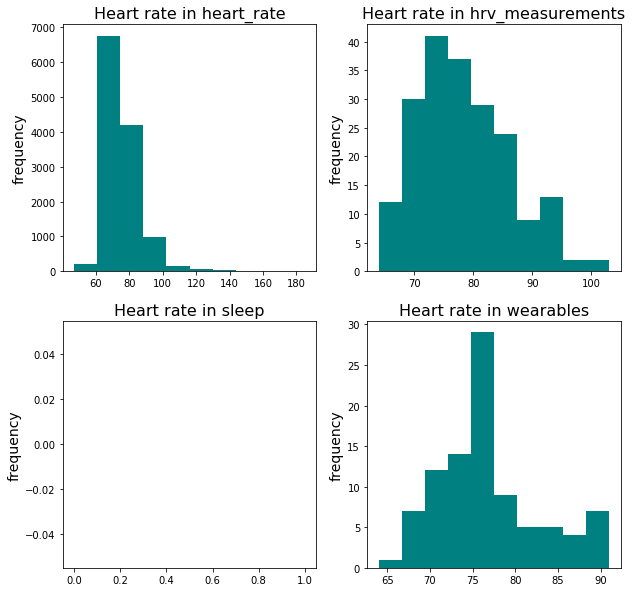

Blood pressure:
--------------------------------------------------------------------------:


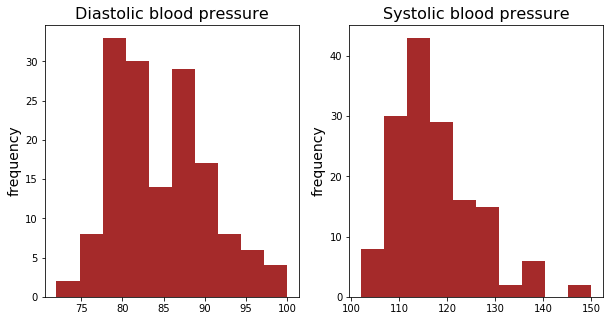

Total power:
--------------------------------------------------------------------------:


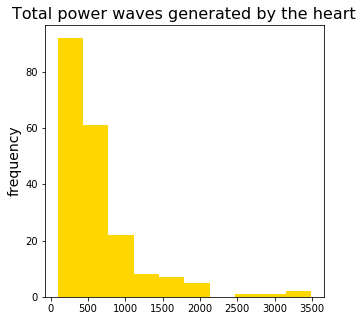

Time asleep:
--------------------------------------------------------------------------:


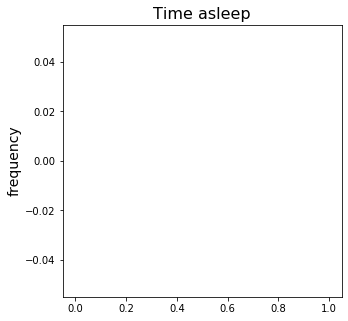

Outdoor air temperature:
--------------------------------------------------------------------------:


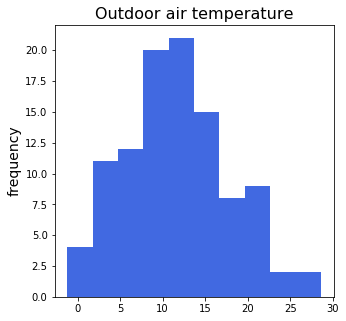

In [8]:
CheckDataDist(['01bad5a519','fde84801d8'],   
              heart_rate = True, 
              blood_pres = True, 
              tot_power = True, 
              sleepDur = True,
              outdoorTemp = True )

## 4. A Function to plot bar chart for some labels of some patients (in survey data)
### It does not include label "SYMPTOMS" because "SYMPTOMS" only appears 4 times in the survey file

In [9]:
def plotSurveybar(PatientCodes):
    '''
    input: 
        PatientCodes: a list of Patient Code 
        
    output:
        Bar chart for the labels(COUGH, FEVER, BREATH, FATIGUE, PAIN, CONFUSION, TROUBLE, BLUISH, OVERALL)
    '''
    
    Meaning = ['1:User isn’t experiencing symptom', '2:Very mild', '3:Mild', '4:Moderate', '5:Severe', '6:Extremely severe']
    PlotLabels = ["COUGH", "FEVER", "BREATH", "FATIGUE", "PAIN", "CONFUSION", "TROUBLE", "BLUISH", "OVERALL" ] 
    labels= ["S_COVID_"+ l for l in PlotLabels]

    surveys_patient = surveys_pd.loc[surveys_pd.user_code.isin(PatientCodes),].loc[surveys_pd.scale.isin(labels),:][['scale','value']]
    surveys_patient['number'] = 1
    ValueStats = surveys_patient.groupby(['scale','value']).sum().to_dict()['number']

    value1 = [ValueStats[(la,1)] if (la,1) in ValueStats.keys() else 0 for la in labels]
    value2 = [ValueStats[(la,2)] if (la,2) in ValueStats.keys() else 0 for la in labels]
    value3 = [ValueStats[(la,3)] if (la,3) in ValueStats.keys() else 0 for la in labels]
    value4 = [ValueStats[(la,4)] if (la,4) in ValueStats.keys() else 0 for la in labels]
    value5 = [ValueStats[(la,5)] if (la,5) in ValueStats.keys() else 0 for la in labels]
    value6 = [ValueStats[(la,6)] if (la,6) in ValueStats.keys() else 0 for la in labels]


    width = 0.3 # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(PlotLabels, value1, width, label=Meaning[0])
    ax.bar(PlotLabels, value2, width, bottom=value1, label=Meaning[1])
    ax.bar(PlotLabels, value3, width, bottom=list(map(sum, zip(value1,value2))), label=Meaning[2])
    ax.bar(PlotLabels, value4, width, bottom=list(map(sum, zip(value1,value2,value3))), label=Meaning[3])
    ax.bar(PlotLabels, value5, width, bottom=list(map(sum, zip(value1,value2,value3,value4))), label=Meaning[4])
    ax.bar(PlotLabels, value6, width, bottom=list(map(sum, zip(value1,value2,value3,value4,value5))), label=Meaning[5])
    ax.set_ylabel('Frequency')
    ax.set_title('Patient %s'%PatientCodes)
    plt.xticks(rotation=80)
    ax.legend(loc=(1.04,0))

    plt.show()


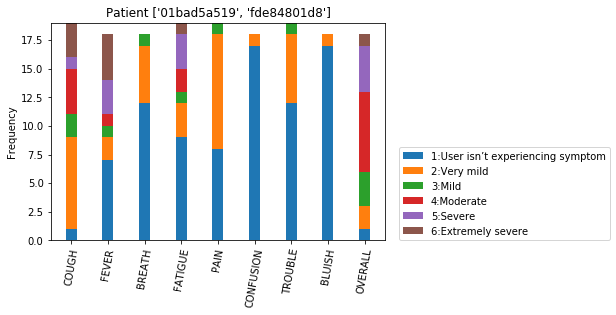

In [10]:
#example
plotSurveybar(['01bad5a519','fde84801d8'])

## 5. Bar chart of patients' record duration for each file

In [11]:
#calculate the length of record duration for each file per patient 
blood_pressure_time_len = []
heart_rate_time_len = [] 
hrv_measurements_time_len =[]
wearables_time_len = []
sleep_time_len = []
surveys_time_len = []
weather_time_len = []
for i in participants_pd['user_code']:
    alltime = CheckTimeInterval(i, False) 
    blood_pressure_time_len.append( len(alltime['blood_pressure_time']) )
    heart_rate_time_len.append( len(alltime['heart_rate_time']) )
    hrv_measurements_time_len.append( len(alltime['hrv_measurements_time']) )
    wearables_time_len.append( len(alltime['wearables_time']) )
    sleep_time_len.append( len(alltime['sleep_time']) )
    surveys_time_len.append( len(alltime['surveys_time']) )
    weather_time_len.append( len(alltime['weather_time']) )

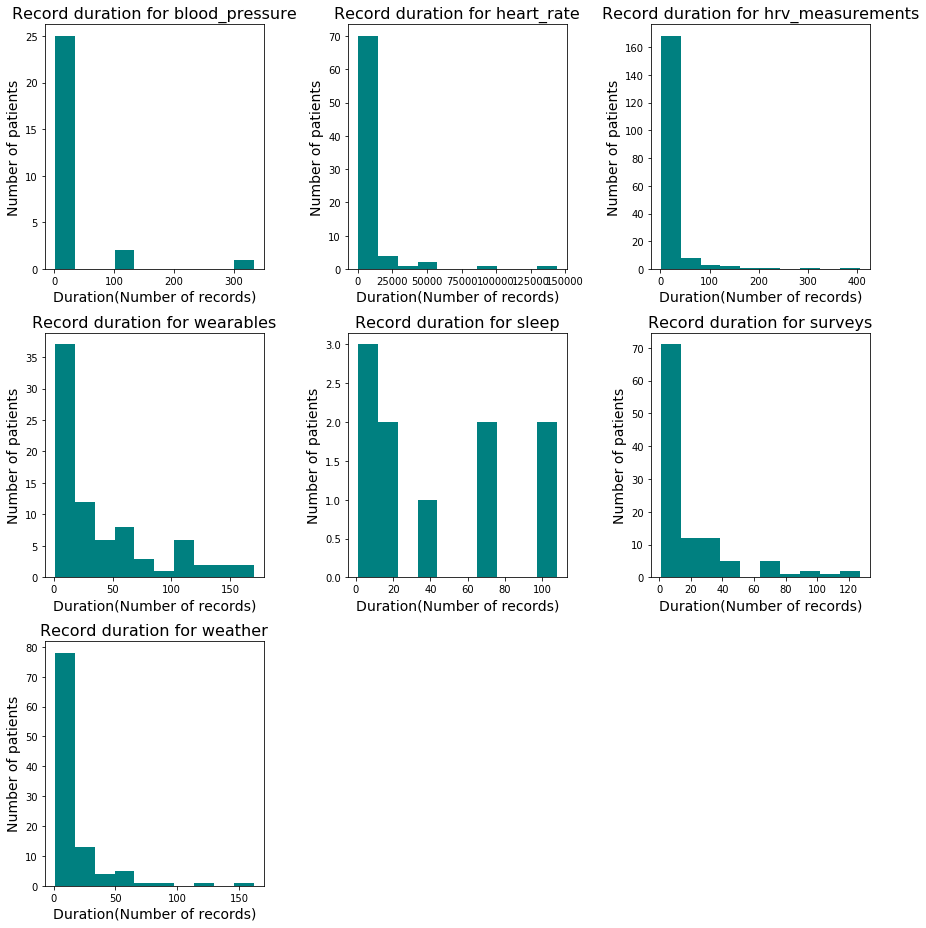

In [12]:
d = {"blood_pressure": blood_pressure_time_len, "heart_rate":heart_rate_time_len, 
     "hrv_measurements": hrv_measurements_time_len, "wearables":wearables_time_len,
     "sleep": sleep_time_len, "surveys":surveys_time_len, "weather":weather_time_len}

plt.figure(figsize=(13,13))  
for i in range(7):
    plt.subplot(3,3,i+1)
    key = list(d.keys())[i] 
    #plt.hist(d[key] ,  density=0, facecolor='teal')                                 #Original duration  
    plt.hist(list(filter(lambda num:num!= 0, d[key])),density=0, facecolor='teal') #Modified duration(0 value deleted)  
    plt.xlabel('Duration(Number of records)',fontsize=14) 
    plt.ylabel('Number of patients',fontsize=14) 
    plt.title('Record duration for %s'%key, fontsize=16)
    
_ =plt.tight_layout()

#end